In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

In [4]:
print(data.head())

    Case Type  Case Duration (Days)  Judge Experience (Years)  \
0    Criminal                   221                        39   
1       Civil                   212                        14   
2       Civil                    47                         6   
3  Commercial                   358                        13   
4    Criminal                    33                        17   

   Number of Witnesses  Legal Fees (USD)  Plaintiff's Reputation  \
0                   18             24306                       2   
1                    1             42444                       3   
2                   19             21418                       1   
3                    9             45005                       3   
4                   17             36315                       2   

   Defendant's Wealth (USD)  Number of Evidence Items  \
0                    663160                         3   
1                    252011                        67   
2                    307309  

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   200 non-null    object
 1   Case Duration (Days)        200 non-null    int64 
 2   Judge Experience (Years)    200 non-null    int64 
 3   Number of Witnesses         200 non-null    int64 
 4   Legal Fees (USD)            200 non-null    int64 
 5   Plaintiff's Reputation      200 non-null    int64 
 6   Defendant's Wealth (USD)    200 non-null    int64 
 7   Number of Evidence Items    200 non-null    int64 
 8   Number of Legal Precedents  200 non-null    int64 
 9   Settlement Offered (USD)    200 non-null    int64 
 10  Severity                    200 non-null    int64 
 11  Outcome                     200 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 18.9+ KB
None


In [6]:
print(data.isnull().sum())

Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64


In [7]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

X = pd.get_dummies(X, columns=['Case Type'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)

print("eğitim seti boyutu:", X_train.shape, y_train.shape)
print("test seti boyutu:", X_test.shape, y_test.shape)

eğitim seti boyutu: (160, 13) (160,)
test seti boyutu: (40, 13) (40,)


In [8]:
clf = DecisionTreeClassifier(max_depth=6, random_state=50)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred = clf.predict(X_test)

print("doğruluk:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1-score:", f1_score(y_test, y_pred))
print("\nsınıflandırma raporu:\n", classification_report(y_test, y_pred))

doğruluk: 1.0
precision: 0.0
recall: 0.0
f1-score: 0.0

sınıflandırma raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

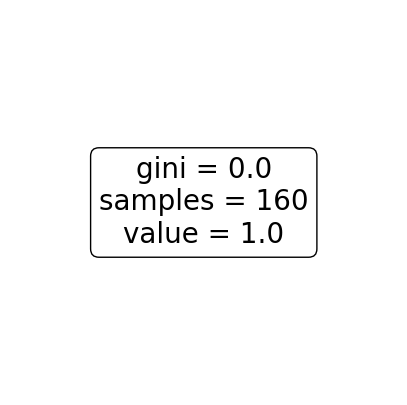

In [10]:
plt.figure(figsize=(5,5))
plot_tree(clf, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=20)
plt.show()

In [11]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("ozellik önemleri:")
print(feature_importance.head(10))

ozellik önemleri:
Case Duration (Days)          0.0
Judge Experience (Years)      0.0
Number of Witnesses           0.0
Legal Fees (USD)              0.0
Plaintiff's Reputation        0.0
Defendant's Wealth (USD)      0.0
Number of Evidence Items      0.0
Number of Legal Precedents    0.0
Settlement Offered (USD)      0.0
Severity                      0.0
dtype: float64


Elimizdeki veriye bakarak tahminler yapmamıza yardımcı olan bir yöntem. 
Nasıl çalıştığını basitçe anlatmak gerekirse, her seferinde verideki bir özelliğe göre “evet,hayır” gibi ayrımlar yapıyor ve bu ayrımları takip ederek sonuca ulaşıyor.

Modele baktığımızda, her adımda en iyi ayırımı yapan özelliği seçiyor. Bu da bize hangi bilgilerin dava sonucunu daha çok etkilediğini gösteriyor. Mesela ağacın en üstünde yer alan özellikler genellikle en belirleyici olanlar. Bizim çalışmada da davanın türü, taraf sayısı gibi bazı bilgiler sonuca ulaşmada daha etkili çıktı. Böylece hangi faktörlerin daha önemli olduğunu görebildik.